In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import gc

sns.set()
%matplotlib inline

import sys
# np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(precision=3)

# DISPLAY_MAX_ROWS = 20 #20
# pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
# pd.set_option('display.max_column',None)
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-3584830a1662>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Библиотека Pandas

In [ ]:
# Импорт pandas
import pandas as pd

**[Pandas](http://pandas.pydata.org)** — это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками `Matplotlib` и `Seaborn` появляется возможность удобного визуального анализа табличных данных.

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

# Series

**Создание объекта Series из 4 элементов, индексированных именами:**

In [4]:
salaries = pd.Series([400, 300, 200, 250], index=["Andrew", "Bob", "Charles", "Ann"])
print(salaries)

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64


In [5]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [6]:
print(salaries.Andrew == salaries['Andrew'])

True


**Series поддерживает пропуски в данных.**

In [9]:
salaries["Carl"] = np.nan
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [10]:
salaries.fillna(salaries.median(), inplace=True)

In [11]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

In [12]:
salaries.mean()

285.0

In [13]:
salaries.min()

200.0

**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [14]:
print("Second element of salaries is", salaries[1], "\n")
# Smart indexing
print(salaries[:3], "\n")
print("There are", len(salaries[salaries > 0]), "positive elements in salaries\n")
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


# Создание объекта типа DataFrame вручную

In [15]:
# Через словарь:

df = pd.DataFrame(
  {'id': [1, 2, 3],
   'name': ['Bob', 'Alice', 'Scott'],
   'age': [21, 15, 30]}
)

df.head()

,id,name,age
0,1,Bob,21
1,2,Alice,15
2,3,Scott,30


In [16]:
# Через вложенные списки:

df = pd.DataFrame(
  [[1,'Bob', 21],
   [2,'Alice', 15],
   [3,'Scott', 30]],
  columns = ['id','name', 'age']
)

df.head()

,id,name,age
0,1,Bob,21
1,2,Alice,15
2,3,Scott,30


# Демонстрация основных методов Pandas
## Чтение таблицы и первичный анализ

Прочитаем данные и посмотрим на первые 5 строк с помощью метода head:

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Информация по датасету на [кагле](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets)

In [ ]:
df.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1481,MD,129,415,No,Yes,34,204.5,79,34.77,132.8,113,11.29,190.1,117,8.55,14.8,9,4.00,2,False
180,WV,94,510,Yes,Yes,23,197.1,125,33.51,214.5,136,18.23,282.2,103,12.70,9.5,5,2.57,4,False
1507,MN,116,408,No,No,0,197.9,84,33.64,168.1,113,14.29,239.8,145,10.79,12.0,6,3.24,1,False
1359,VT,73,415,No,No,0,217.8,91,37.03,220.6,97,18.75,277.3,89,12.48,10.3,6,2.78,1,True
2995,AZ,69,415,No,Yes,31,194.9,63,33.13,191.6,90,16.29,153.0,129,6.89,13.2,2,3.56,2,False
2655,NE,64,510,No,No,0,219.2,73,37.26,167.0,65,14.20,161.4,119,7.26,10.0,5,2.70,1,False
2463,WY,146,415,No,Yes,11,180.7,82,30.72,173.7,90,14.76,231.5,89,10.42,10.1,4,2.73,2,False
788,AL,90,415,No,No,0,214.9,97,36.53,117.8,117,10.01,133.7,78,6.02,11.8,2,3.19,2,False
3280,AR,76,408,No,No,0,107.3,140,18.24,238.2,133,20.25,271.8,116,12.23,10.0,3,2.70,4,True
3056,IL,131,510,No,No,0,263.4,123,44.78,151.9,74,12.91,218.5,101,9.83,10.7,2,2.89,2,False


В Jupyter-ноутбуках датафреймы `Pandas` выводятся в виде вот таких красивых табличек, и `print(df.head())` выглядит хуже.

Кстати, по умолчанию `Pandas` выводит всего 20 столбцов и 60 строк, поэтому если ваш датафрейм больше, воспользуйтесь функцией `set_option`:

In [23]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

А также укажем значение параметра `presicion` равным 2, чтобы отображать два знака после запятой (а не 6, как установлено по умолчанию.

In [24]:
# pd.set_option("precision", 2)
pd.set_option('display.precision', 2)

**Посмотрим на размер данных, названия признаков и их типы**

In [25]:
print(df.shape)

(3333, 20)


Видим, что в таблице 3333 строки и 20 столбцов. Выведем названия столбцов:

In [26]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [27]:
df.columns[1:10:2].tolist()

['Account length',
 'International plan',
 'Number vmail messages',
 'Total day calls',
 'Total eve minutes']

Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом **`info`**:

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` и `object` — это типы признаков. Видим, что 1 признак — логический (`bool`), 3 признака имеют тип `object` и 16 признаков — числовые.

**Изменить тип колонки** можно с помощью метода `astype`. Применим этот метод к признаку `Churn` и переведём его в `int64`:

In [ ]:
df["Churn"] = df["Churn"].astype("int64")

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Метод **`describe`** показывает основные статистические характеристики данных по каждому числовому признаку (типы `int64` и `float64`): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include`='all', чтоб вывести статистику по всем имеющимся признакам.

In [ ]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


In [ ]:
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


Для категориальных (тип `object`) и булевых (тип `bool`) признаков  можно воспользоваться методом **`value_counts`**. Посмотрим на распределение нашей целевой переменной — `Churn`:

In [ ]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 пользователей из 3333 — лояльные, значение переменной `Churn` у них — `0`.

Посмотрим на распределение пользователей по переменной `Area code`. Укажем значение параметра `normalize=True`, чтобы посмотреть не абсолютные частоты, а относительные.

In [ ]:
df["Area code"].value_counts(normalize=True)

415    0.50
510    0.25
408    0.25
Name: Area code, dtype: float64

## Сортировка

`DataFrame` можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по `Total day charge` (`ascending=False` для сортировки по убыванию):

In [30]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True


Сортировать можно и по группе столбцов:

In [ ]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


## Индексация и извлечение данных

`DataFrame` можно индексировать по-разному. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из датафрейма на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида `DataFrame['Name']`. Воспользуемся этим для ответа на вопрос: **какова доля нелояльных пользователей в нашем датафрейме?**

In [ ]:
df["Churn"].mean()

0.14491449144914492

In [ ]:
df.Churn.median()

0.0

14,5% — довольно плохой показатель для компании, с таким процентом оттока можно и разориться.

Очень удобной является логическая индексация `DataFrame` по одному столбцу. Выглядит она следующим образом: `df[P(df['Name'])]`, где `P` - это некоторое логическое условие, проверяемое для каждого элемента столбца `Name`. Итогом такой индексации является `DataFrame`, состоящий только из строк, удовлетворяющих условию `P` по столбцу `Name`.

Воспользуемся этим для ответа на вопрос: **каковы средние значения числовых признаков среди нелояльных пользователей?**

In [ ]:
df[df["Churn"] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

Скомбинировав предыдущие два вида индексации, ответим на вопрос: **сколько в среднем в течение дня разговаривают по телефону нелояльные пользователи**?

In [ ]:
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823

**Какова максимальная длина международных звонков среди лояльных пользователей (`Churn == 0`), не пользующихся услугой международного роуминга (`'International plan' == 'No'`)?**

In [ ]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

In [ ]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")].max()

State                        WY
Account length              243
Area code                   510
International plan           No
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         315.6
Total day calls             163
Total day charge          53.65
Total eve minutes         361.8
Total eve calls             170
Total eve charge          30.75
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         18.9
Total intl calls             19
Total intl charge           5.1
Customer service calls        8
Churn                     False
dtype: object

Датафреймы можно индексировать как по названию столбца или строки, так и по порядковому номеру. Для индексации **по названию** используется метод **`loc`**, **по номеру** — **`iloc`**.

В первом случае мы говорим _«передай нам значения для id строк от 0 до 5 и для столбцов от State до Area code»_, а во втором — _«передай нам значения первых пяти строк в первых трёх столбцах»_.

В случае `iloc` срез работает как обычно, однако в случае `loc` учитываются и начало, и конец среза. Да, неудобно, да, вызывает путаницу.

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [ ]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Метод `ix` индексирует и по названию, и по номеру, но он вызывает путаницу, и поэтому был объявлен устаревшим (deprecated).

Если нам нужна первая или последняя строчка датафрейма, пользуемся конструкцией `df[:1]` или `df[-1:]`:

In [ ]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,False


In [ ]:
 df[:1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


## Применение функций: `apply`, `map` и др.

Метод `apply` можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать `axis=1`.

**Применение функции к каждой ячейке столбца**

Допустим, по какой-то причине нас интересуют все люди из штатов, названия которых начинаются на 'W'. В данному случае это можно сделать по-разному, но наибольшую свободу дает связка `apply`-`lambda` – применение функции ко всем значениям в столбце.

In [37]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True


In [ ]:
 df[df["State"].apply(lambda state: state[0] == "W")]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,WI,87,415,No,No,0,238.0,97,40.46,164.5,97,13.98,282.5,132,12.71,10.6,6,2.86,2,False
3303,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3319,WY,89,415,No,No,0,115.4,99,19.62,209.9,115,17.84,280.9,112,12.64,15.9,6,4.29,3,False
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


Метод `map` можно использовать и для **замены значений в колонке**, передав ему в качестве аргумента словарь вида `{old_value: new_value}`:

In [38]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Аналогичную операцию можно провернуть с помощью метода `replace`:

In [39]:
df = df.replace({"Voice mail plan": d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [40]:
df['Total day hours'] = df['Total day minutes'] / 60 # создание нового столбца
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total day hours
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,4.42
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,2.69
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,4.06
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,4.99
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,2.78
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,3.72
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,3.64
7,MO,147,415,True,False,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False,2.62
8,LA,117,408,False,False,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,3.08
9,WV,141,415,True,True,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False,4.31


## Группировка данных

В общем случае группировка данных в Pandas выглядит следующим образом:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. К датафрейму применяется метод **`groupby`**, который разделяет данные по `grouping_columns` – признаку или набору признаков.
3. Индексируем по нужным нам столбцам (`columns_to_show`).
2. К полученным группам применяется функция или несколько функций.

**Группирование данных в зависимости от значения признака `Churn` и вывод статистик по трём столбцам в каждой группе.**

In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Сделаем то же самое, но немного по-другому, передав в `agg` список функций:

In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

## Сводные таблицы

Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — `Churn` и `Customer service calls`. Для этого мы можем построить **таблицу сопряженности**, воспользовавшись методом **`crosstab`**:

In [51]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
False,2664,186
True,346,137


In [62]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
False,0.60,0.25
True,0.12,0.02


Мы видим, что большинство пользователей — лояльные и пользуются дополнительными услугами (международного роуминга / голосовой почты).

Продвинутые пользователи `Excel` наверняка вспомнят о такой фиче, как **сводные таблицы** (`pivot tables`). В `Pandas` за сводные таблицы отвечает метод **`pivot_table`**, который принимает в качестве параметров:

* `values` – список переменных, по которым требуется рассчитать нужные статистики,
* `index` – список переменных, по которым нужно сгруппировать данные,
* `aggfunc` — то, что нам, собственно, нужно посчитать по группам — сумму, среднее, максимум, минимум или что-то ещё.

Давайте посмотрим среднее число дневных, вечерних и ночных звонков для разных `Area code`:

In [48]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [ ]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


## Преобразование датафреймов

Как и многие другие вещи, добавлять столбцы в `DataFrame` можно несколькими способами.

Например, мы хотим посчитать общее количество звонков для всех пользователей. Создадим объект `total_calls` типа `Series` и вставим его в датафрейм:

In [ ]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc - номер столбца, после которого нужно вставить данный Series
# мы указали len(df.columns), чтобы вставить его в самом конце
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total day hours,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,4.418333,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,2.693333,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,4.056667,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,4.990000,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,2.778333,359


Добавить столбец из имеющихся можно и проще, не создавая промежуточных `Series`:

In [ ]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total day hours,Total calls,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,4.418333,303,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,2.693333,332,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,4.056667,333,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,4.990000,255,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,2.778333,359,52.09


Чтобы удалить столбцы или строки, воспользуйтесь методом `drop`, передавая в качестве аргумента нужные индексы и требуемое значение параметра `axis` (`1`, если удаляете столбцы, и ничего или `0`, если удаляете строки):

In [ ]:
# избавляемся от созданных только что столбцов
df = df.drop(["Total charge", "Total calls"], axis=1)

df.drop([1, 2]).head()  # а вот так можно удалить строчки

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total day hours
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,4.418333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,4.990000
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,2.778333
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,3.723333
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,3.636667


## Первые попытки прогнозирования оттока

Посмотрим, как отток связан с признаком *Подключение международного роуминга* (`International plan`). Сделаем это с помощью сводной таблички `crosstab`, а также путем иллюстрации с `Seaborn` (как именно строить такие картинки и анализировать с их помощью графики – материал следующей статьи.)

In [49]:
# надо дополнительно установить (команда в терминале)
# чтоб картинки рисовались в тетрадке
# !conda install seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 6)

In [53]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


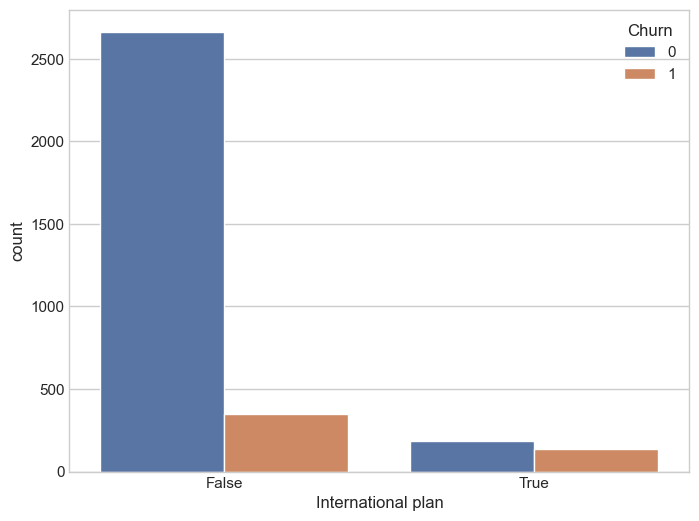

In [ ]:
sns.countplot(x="International plan", hue="Churn", data=df)
plt.savefig("int_plan_and_churn.png", dpi=300);

Видим, что когда роуминг подключен, доля оттока намного выше – интересное наблюдение! Возможно, большие и плохо контролируемые траты в роуминге очень конфликтогенны и приводят к недовольству клиентов телеком-оператора и, соответственно, к их оттоку.

Далее посмотрим на еще один важный признак – *Число обращений в сервисный центр* (`Customer service calls`). Также построим сводную таблицу и картинку.

In [54]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


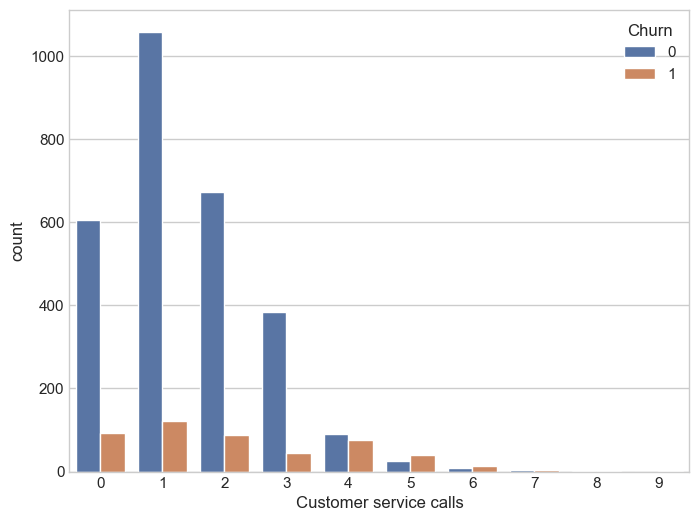

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)
plt.savefig("serv_calls__and_churn.png", dpi=300);

Может быть, по сводной табличке это не так хорошо видно (или скучно ползать взглядом по строчкам с цифрами), а вот картинка красноречиво свидетельствует о том, что доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.

Добавим теперь в наш DataFrame бинарный признак — результат сравнения `Customer service calls > 3`. И еще раз посмотрим, как он связан с оттоком.

In [55]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


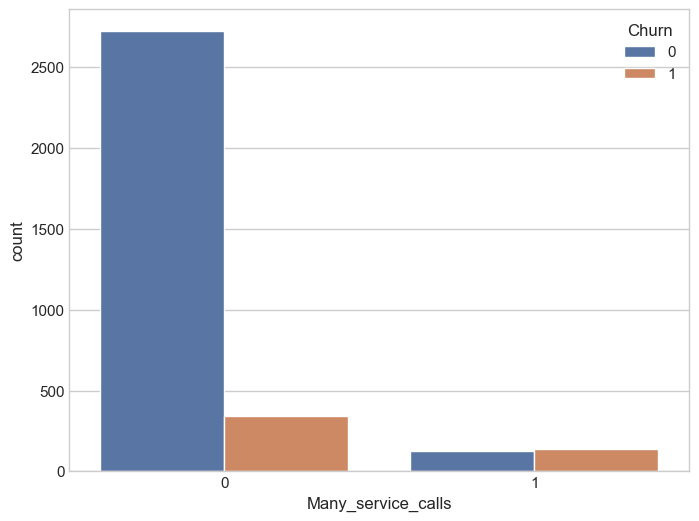

In [ ]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df)
plt.savefig("many_serv_calls__and_churn.png", dpi=300);

Объединим рассмотренные выше условия и построим сводную табличку для этого объединения и оттока.

In [64]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"])

Churn,False,True
row_0,,
False,2841,464
True,9,19


Значит, прогнозируя отток клиента в случае, когда число звонков в сервисный центр больше 3 и подключен роуминг (и прогнозируя лояльность – в противном случае), можно ожидать около 85.8% правильных попаданий (ошибаемся всего 464 + 9 раз). Эти 85.8%, которые мы получили с помощью очень простых рассуждений – это неплохая отправная точка (*baseline*) для дальнейших моделей машинного обучения, которые мы будем строить.

Значит, прогнозируя отток клиента в случае, когда число звонков в сервисный центр больше 3 и подключен роуминг (и прогнозируя лояльность – в противном случае), можно ожидать около 85.8% правильных попаданий (ошибаемся всего 464 + 9 раз). Эти 85.8%, которые мы получили с помощью очень простых рассуждений – это неплохая отправная точка (*baseline*) для дальнейших моделей машинного обучения, которые мы будем строить.

# Задания:

Для выполнения задания №1 поработаем с данными, собранными благодаря опросу студентов математического курса средней школы в Португалии (возраст - от 15 до 22 лет). Они находятся в файле "math_students.csv". Целевой переменной является итоговая оценка студента за курс.

Для выполнения задания также рассмотрим некоторые функции и методы pandas, которые не встречались выше

In [69]:
# если данные и ноутбук находятся в разных папках, то для загрузки файла помимо названия необходимо также прописать путь к нему
# .csv - текстовый файл для представления табличных данных, разделенных каким-то символом. В данном случае - запятой

url = 'https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem01_intro/math_students.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [67]:
# В данном случае объектами являются студенты, признаками - различные их характеристики. Найдем число и тех, и других:
data.shape

(395, 33)

Всего объектов 395, а признаков - 33. Все признаки имеют разную природу.
Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

In [ ]:
# Аналогично, можно смотреть не на верхние строки таблицы, а на нижние:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [ ]:
data.sample(10) # можно случайной выборкой

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
204,GP,F,16,R,GT3,T,2,2,services,services,reputation,mother,2,4,0,no,yes,yes,yes,no,yes,yes,no,5,3,5,1,1,5,6,10,10,11
182,GP,F,17,U,GT3,T,2,4,services,services,reputation,father,1,2,0,no,yes,no,yes,yes,yes,no,no,5,4,2,2,3,5,0,16,17,17
132,GP,F,17,U,LE3,T,2,2,other,other,course,father,1,1,0,no,yes,no,no,yes,yes,yes,yes,3,4,4,1,3,5,12,10,13,12
228,GP,M,18,U,LE3,T,2,1,at_home,other,course,mother,4,2,0,yes,yes,yes,yes,yes,yes,yes,yes,4,3,2,4,5,3,14,10,8,9
376,MS,F,20,U,GT3,T,4,2,health,other,course,other,2,3,2,no,yes,yes,no,no,yes,yes,yes,5,4,3,1,1,3,4,15,14,15
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
372,MS,F,17,U,GT3,T,2,2,other,at_home,home,mother,1,3,0,no,no,no,yes,yes,yes,no,yes,3,4,3,1,1,3,8,13,11,11
314,GP,F,19,U,GT3,T,1,1,at_home,health,home,other,1,3,2,no,no,no,no,no,yes,yes,yes,4,1,2,1,1,3,14,15,13,13
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
231,GP,M,17,R,GT3,T,2,2,other,other,course,father,2,2,0,no,yes,yes,yes,yes,yes,yes,no,4,5,2,1,1,1,4,11,11,11


In [70]:
data.columns # названия столбцов.

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data.info() # кол-во и формат данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [71]:
# проверим пропуски данных по столбцам
data.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [72]:
# проверим пропуски данных по столбцам
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [73]:
# проверим пропуски данных
data.isnull().any().any()

False

In [ ]:
data.isnull().sum() # кол-во пропущенных значений по столбцам

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [74]:
# Посмотрим уникальные значения признака guardian - Для примера
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [76]:
guard = data['guardian'].unique()
print(len(guard))

data['guardian'].nunique() # кол-во уникальных значений

3


3

In [77]:
data['guardian'].value_counts() # пример распределения

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [ ]:
# Фильтрация по значению - пример
data[data['age'] > 19].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8
306,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,0,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,17,18,18
376,MS,F,20,U,GT3,T,4,2,health,other,course,other,2,3,2,no,yes,yes,no,no,yes,yes,yes,5,4,3,1,1,3,4,15,14,15
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7


In [ ]:
data[data['age'] == 20].head() # Фильтрация по значению - пример

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
306,GP,M,20,U,GT3,A,3,2,services,other,course,other,1,1,0,no,no,no,yes,yes,yes,no,no,5,5,3,1,1,5,0,17,18,18
376,MS,F,20,U,GT3,T,4,2,health,other,course,other,2,3,2,no,yes,yes,no,no,yes,yes,yes,5,4,3,1,1,3,4,15,14,15
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9


In [ ]:
# Сложные запросы
# Выделим только тех студентов, у которых опекуном является мать и которая работает учителем или на дому:
data[(data['guardian'] == 'mother') & ((data['Mjob'] == 'teacher') | (data['Mjob'] == 'at_home'))].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
10,GP,F,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0,10,8,9
13,GP,M,15,U,GT3,T,4,3,teacher,other,course,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,5,4,3,1,2,3,2,10,10,11
20,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,1,1,1,1,0,13,14,15


## Перейдем уже к более к конкретной задаче

Проанализируем взаимосвязь количества пропусков и успехов в учебе. Посмотрим на распределение количества пропусков у студентов:

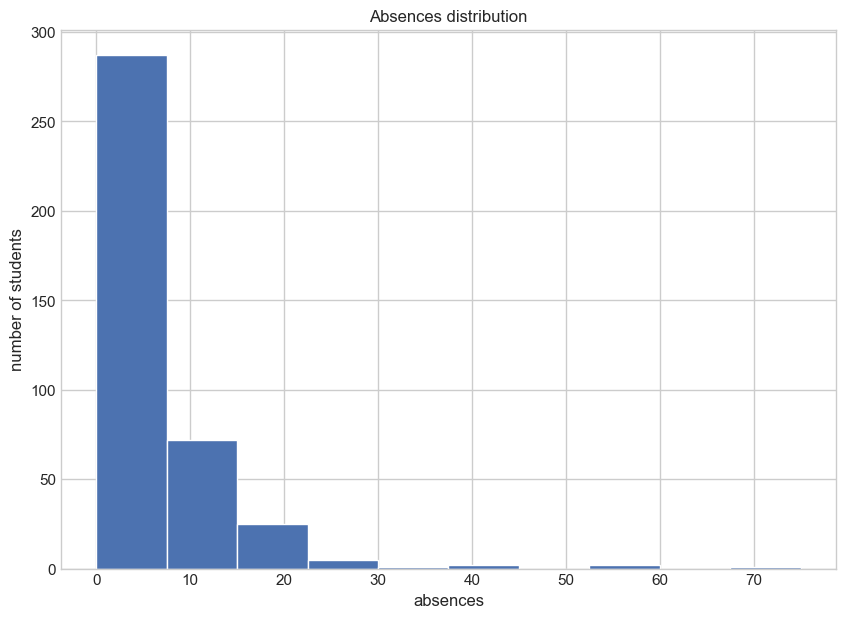

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title('Absences distribution')
data['absences'].hist()
plt.xlabel('absences')
plt.ylabel('number of students')
plt.show()

In [ ]:
# Посмотрим на среднее количество пропусков:
data['absences'].mean()

5.708860759493671

Итак, из гистограммы и полученного значения можно сделать вывод, что большинство студентов пропускает не так много занятий.

Теперь посмотрим влияние количества пропусков на итоговую оценку. Для этого разделим студентов на две части: те, у кого количество пропусков меньше среднего, и те, у кого оно не меньше среднего.

In [ ]:
mean_absences = data['absences'].mean()
stud_few_absences = data[data['absences'] < mean_absences]
stud_many_absences = data[data['absences'] >= mean_absences]
mean_absences

5.708860759493671

In [ ]:
stud_few_absences

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
stud_many_absences

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
16,GP,F,16,U,GT3,T,4,4,services,services,reputation,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,no,3,2,3,1,2,2,6,13,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,MS,F,17,R,GT3,T,1,2,other,other,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,3,5,5,1,3,1,14,6,5,5
379,MS,F,17,R,GT3,T,3,1,at_home,other,reputation,mother,1,2,0,no,yes,yes,yes,no,yes,yes,no,4,5,4,2,3,1,17,10,10,10
384,MS,M,18,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,no,5,4,3,4,3,3,14,6,5,5
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,5,6


In [ ]:
# Посмотрим, сколько получилось и тех, и других.

print('Students with few absences:', stud_few_absences.shape[0])
print('Students with many absences:', stud_many_absences.shape[0])

Students with few absences: 249
Students with many absences: 146


In [ ]:
# Посчитаем среднее значение целевой переменной для каждой части.

stud_few_absences_g3 = stud_few_absences['G3'].mean()
stud_many_absences_g3 = stud_many_absences['G3'].mean()
print('Students with few absences, mean G3:', stud_few_absences_g3)
print('Students with many absences, mean G3:', stud_many_absences_g3)

Students with few absences, mean G3: 10.168674698795181
Students with many absences, mean G3: 10.835616438356164


Итак, средние оценки примерно одинаковы - у тех, кто пропускал меньше занятий, она чуть хуже.

In [ ]:
data.describe() # описательная статистика

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# Сгруппируем данные столбцу Fedu и посчитаем, сколько уникальных значений для каждой группы содержится в остальных столбцах.
data.groupby('Fedu').count()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Fedu,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
2,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
4,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96


In [ ]:
# Посчитаем сумму значений в каждой группе
data.groupby('Fedu').sum(numeric_only=True)

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Fedu,,,,,,,,,,,,,,,
0,31,5,4,6,0,7,7,5,2,2,4,10,24,26,26
1,1407,142,141,160,58,325,266,255,125,195,307,414,798,770,751
2,1914,277,161,238,40,449,377,349,175,263,400,662,1268,1251,1180
3,1667,313,132,212,21,403,315,312,131,226,330,644,1074,1075,1066
4,1576,349,134,188,13,374,313,307,152,219,363,525,1145,1110,1091


In [ ]:
# Рассчитаем среднее значение по каждой группе
data.groupby('Fedu').mean(numeric_only=True)

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Fedu,,,,,,,,,,,,,,,
0,15.50,2.50,2.00,3.00,0.00,3.50,3.50,2.50,1.00,1.00,2.00,5.00,12.00,13.00,13.00
1,17.16,1.73,1.72,1.95,0.71,3.96,3.24,3.11,1.52,2.38,3.74,5.05,9.73,9.39,9.16
2,16.64,2.41,1.40,2.07,0.35,3.90,3.28,3.03,1.52,2.29,3.48,5.76,11.03,10.88,10.26
3,16.67,3.13,1.32,2.12,0.21,4.03,3.15,3.12,1.31,2.26,3.30,6.44,10.74,10.75,10.66
4,16.42,3.64,1.40,1.96,0.14,3.90,3.26,3.20,1.58,2.28,3.78,5.47,11.93,11.56,11.36


In [ ]:
# Рассчитаем медиану
data.groupby('Fedu').median(numeric_only=True)

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Fedu,,,,,,,,,,,,,,,
0,15.5,2.5,2.0,3.0,0.0,3.5,3.5,2.5,1.0,1.0,2.0,5.0,12.0,13.0,13.0
1,17.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,3.0,9.0,9.0,10.0
2,17.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,4.0,11.0,11.0,11.0
3,17.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,3.0,4.0,10.0,10.0,10.0
4,16.0,4.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,4.0,12.0,12.0,12.0


In [ ]:
# пример синтаксиса, как можно сагрегировать значения по группам при помощи сразу нескольких функций
data_agg = data.groupby(['Fedu']).agg({
'Fedu': 'count',
'Fedu': 'sum',
'Fedu': 'mean',
'Fedu': 'median'
})#.reset_index()

data_agg.head()

,Fedu
Fedu,
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


Исследуем закономерности, связанные с разными школами. Сгруппируем объекты по школам:

In [ ]:
data_by_school = data.groupby('school')
data_by_school.describe()

age                                               Medu              \
        count   mean   std   min    25%   50%   75%   max  count  mean   std   
school                                                                         
GP      349.0  16.52  1.22  15.0  16.00  16.0  17.0  22.0  349.0  2.80  1.07   
MS       46.0  18.02  0.88  17.0  17.25  18.0  18.0  21.0   46.0  2.35  1.22   

                                  Fedu                                       \
        min  25%  50%  75%  max  count  mean   std  min  25%  50%  75%  max   
school                                                                        
GP      0.0  2.0  3.0  4.0  4.0  349.0  2.55  1.08  0.0  2.0  3.0  3.0  4.0   
MS      1.0  1.0  2.0  3.0  4.0   46.0  2.28  1.13  1.0  1.0  2.0  3.0  4.0   

       traveltime                                      studytime              \
            count  mean   std  min  25%  50%  75%  max     count  mean   std   
school                                                                         
GP          349.0  1.39  0.67  1.0  1.0  1.0  2.0  4.0     349.0  2.06  0.85   
MS           46.0  1.91  0.76  1.0  1.0  2.0  2.0  4.0      46.0  1.83  0.71   

                                failures                                       \
        min  25%  50%  75%  max    count  mean   std  min  25%  50%  75%  max   
school                                                                          
GP      1.0  1.0  2.0  2.0  4.0    349.0  0.32  0.73  0.0  0.0  0.0  0.0  3.0   
MS      1.0  1.0  2.0  2.0  3.0     46.0  0.46  0.81  0.0  0.0  0.0  1.0  3.0   

       famrel        ... Dalc        Walc                                  \
        count  mean  ...  75%  max  count  mean   std  min  25%  50%  75%   
school               ...                                                    
GP      349.0  3.96  ...  2.0  5.0  349.0  2.26  1.31  1.0  1.0  2.0  3.0   
MS       46.0  3.83  ...  2.0  5.0   46.0  2.52  1.11  1.0  2.0  3.0  3.0   

            health                                       absences              \
        max  count  mean   std  min   25%  50%  75%  max    count  mean   std   
school                                                                          
GP      5.0  349.0  3.58  1.38  1.0  3.00  4.0  5.0  5.0    349.0  5.97  8.34   
MS      5.0   46.0  3.39  1.45  1.0  2.25  3.0  5.0  5.0     46.0  3.76  4.27   

                                      G1                                     \
        min  25%  50%   75%   max  count   mean   std  min  25%   50%   75%   
school                                                                        
GP      0.0  0.0  4.0  8.00  75.0  349.0  10.94  3.32  3.0  8.0  11.0  13.0   
MS      0.0  0.0  3.0  4.75  17.0   46.0  10.67  3.35  6.0  8.0  10.5  13.0   

                 G2                                               G3         \
         max  count   mean   std  min  25%   50%    75%   max  count   mean   
school                                                                        
GP      19.0  349.0  10.78  3.81  0.0  9.0  11.0  13.00  19.0  349.0  10.49   
MS      19.0   46.0  10.20  3.38  5.0  8.0  10.0  12.75  18.0   46.0   9.85   

                                           
         std  min  25%   50%    75%   max  
school                                     
GP      4.63  0.0  8.0  11.0  14.00  20.0  
MS      4.24  0.0  8.0  10.0  12.75  19.0  

[2 rows x 128 columns]

In [ ]:
# Теперь посмотрим на среднее значение признаков для каждой школы:

data_by_school.mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,
GP,16.52,2.80,2.55,1.39,2.06,0.32,3.96,3.22,3.11,1.44,2.26,3.58,5.97,10.94,10.78,10.49
MS,18.02,2.35,2.28,1.91,1.83,0.46,3.83,3.33,3.09,1.76,2.52,3.39,3.76,10.67,10.20,9.85


Можно заметить, например, что в среднем до школы Mousinho da Silveira студентам нужно добираться дольше, чем до Gabriel Pereira. Интересно, что, несмотря на это, в среднем количество пропусков у них меньше.

### Ссылки на дополнительные источники информации:

https://nagornyy.me/it/osnovy-analiza-dannykh-v-pandas/

https://habr.com/ru/company/ruvds/blog/494720/

https://github.com/hse-ds/iad-intro-ds/blob/master/2022/seminars/sem02_pandas.ipynb

https://blog.skillfactory.ru/kak-nachat-analizirovat-dannye-v-pandas-pervye-shagi/